# ================================
# 📥 Data Cleaning & Preprocessing
# ================================

# Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset

In [ ]:
file_path = "solarpowergeneration.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset

In [ ]:
print("\n📌 First 5 rows of the dataset:")
display(df.head())


📌 First 5 rows of the dataset:


,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


# Renaming columns for better readability

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace("-", "_").str.replace("(", "").str.replace(")", "")
df.columns = df.columns.str.replace("average_wind_speed_period", "average_wind_speed_")
df.columns = df.columns.str.replace("average_pressure_period", "average_pressure_")

C:\Users\kaush\AppData\Local\Temp\ipykernel_37240\3302593714.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.lower().str.replace("-", "_").str.replace("(", "").str.replace(")", "")
C:\Users\kaush\AppData\Local\Temp\ipykernel_37240\3302593714.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.lower().str.replace("-", "_").str.replace("(", "").str.replace(")", "")


# Replacing invalid zero values with NaN in selected columns

In [ ]:
columns_with_invalid_zeros = [
    'power_generated', 
    'average_wind_speed_', 
    'humidity', 
    'wind_speed'
]

df[columns_with_invalid_zeros] = df[columns_with_invalid_zeros].replace(0, np.nan)

# Fill NaNs with column mean

In [ ]:
df.fillna(df.mean(numeric_only=True), inplace=True)

# Display basic information after cleaning

In [ ]:
print("\n📌 Data Info After Cleaning:")
df.info()


📌 Data Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   distance_to_solar_noon  2920 non-null   float64
 1   temperature             2920 non-null   int64  
 2   wind_direction          2920 non-null   int64  
 3   wind_speed              2920 non-null   float64
 4   sky_cover               2920 non-null   int64  
 5   visibility              2920 non-null   float64
 6   humidity                2920 non-null   int64  
 7   average_wind_speed_     2920 non-null   float64
 8   average_pressure_       2920 non-null   float64
 9   power_generated         2920 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 228.2 KB


# Check for any remaining missing values

In [ ]:
print("\n📌 Missing Values:")
print(df.isnull().sum())


📌 Missing Values:
distance_to_solar_noon    0
temperature               0
wind_direction            0
wind_speed                0
sky_cover                 0
visibility                0
humidity                  0
average_wind_speed_       0
average_pressure_         0
power_generated           0
dtype: int64


# ===================
# 📊 Exploratory Data Analysis (EDA)
# ===================

In [ ]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Distribution of target variable


📈 Distribution of Power Generated


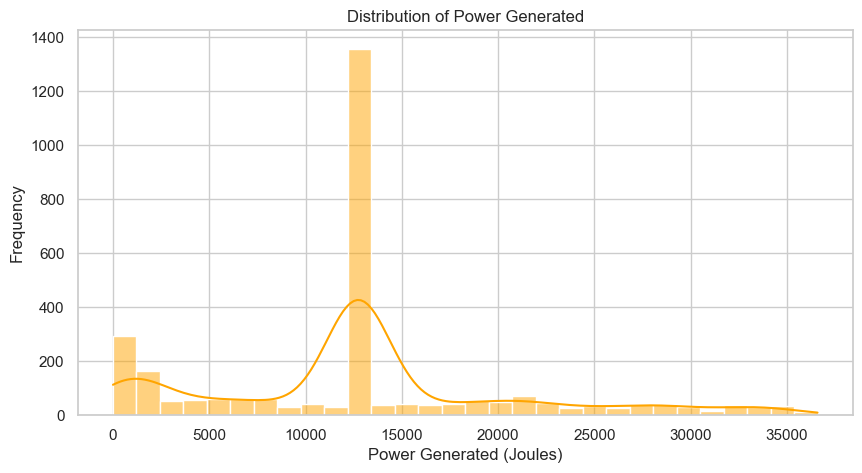

In [ ]:
print("\n📈 Distribution of Power Generated")
plt.figure(figsize=(10,5))
sns.histplot(df['power_generated'], bins=30, kde=True, color='orange')
plt.title('Distribution of Power Generated')
plt.xlabel('Power Generated (Joules)')
plt.ylabel('Frequency')
plt.show()

# 2. Boxplots to detect outliers


📦 Boxplots for Continuous Variables


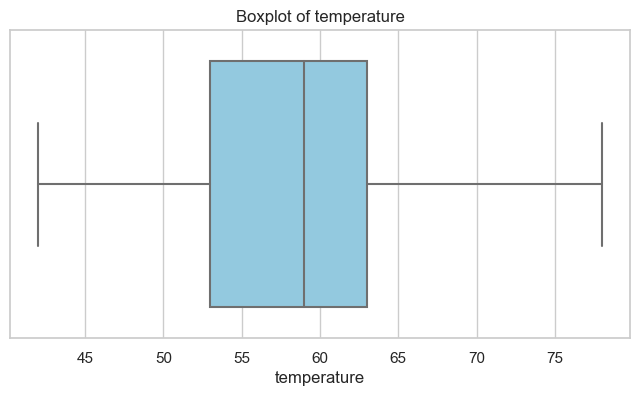

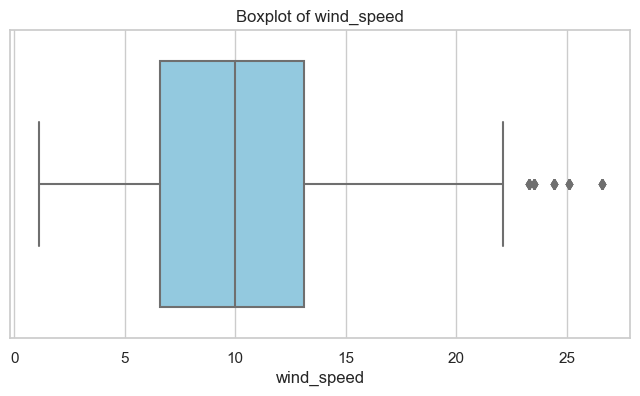

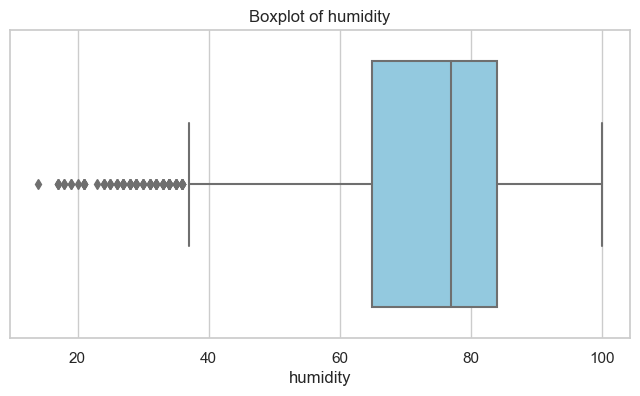

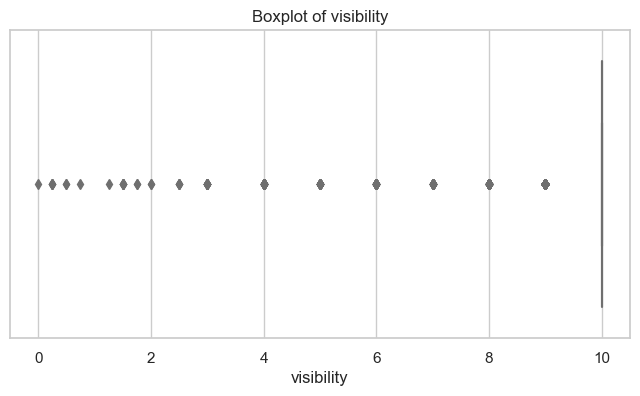

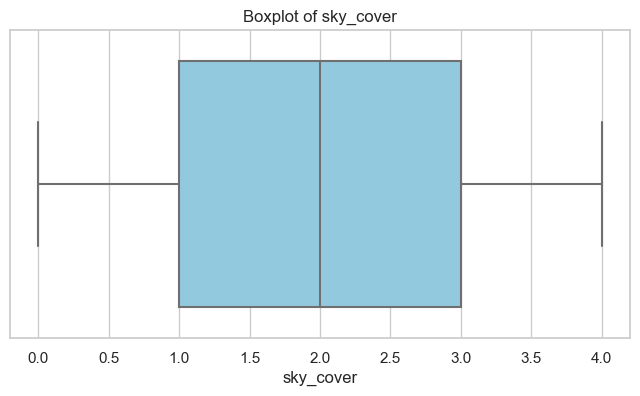

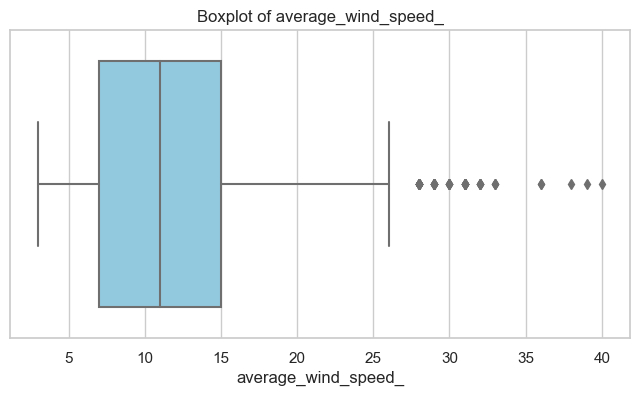

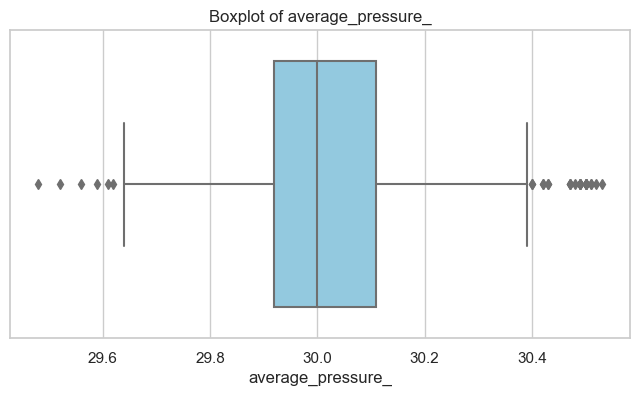

In [ ]:
print("\n📦 Boxplots for Continuous Variables")
features_to_plot = ['temperature', 'wind_speed', 'humidity', 'visibility', 
                    'sky_cover', 'average_wind_speed_', 'average_pressure_']

for col in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.show()

# 3. Correlation heatmap


🔗 Correlation Heatmap


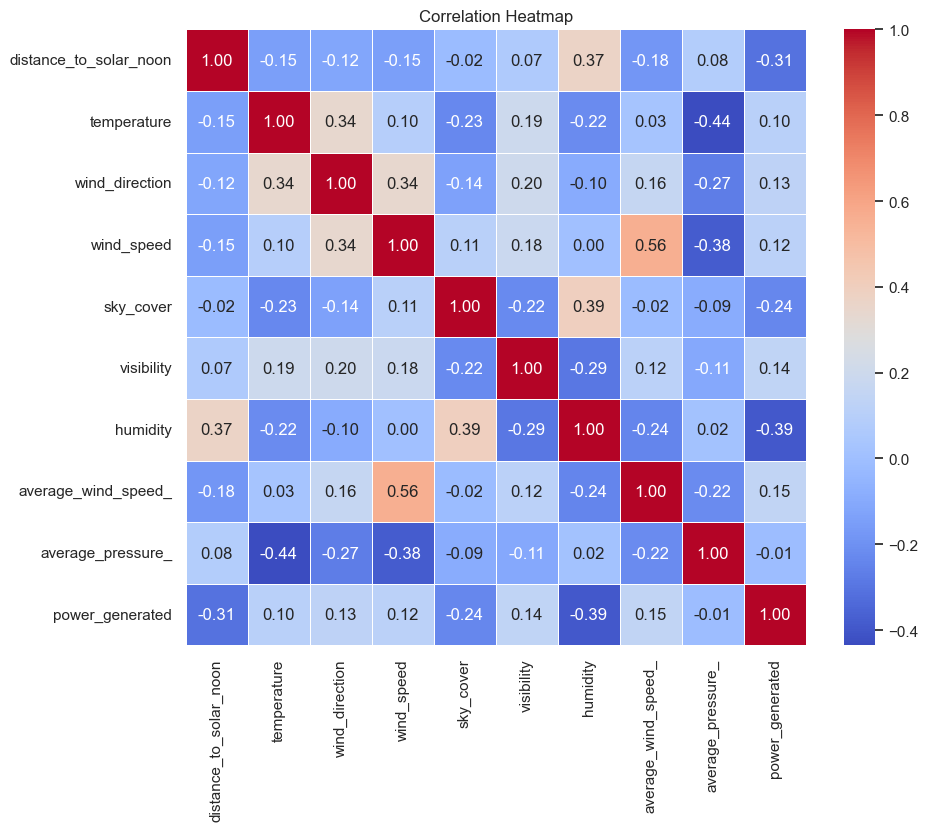

In [ ]:
print("\n🔗 Correlation Heatmap")
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 4. Pairplot (optional: limited to key features)


 Pairplot of Selected Features


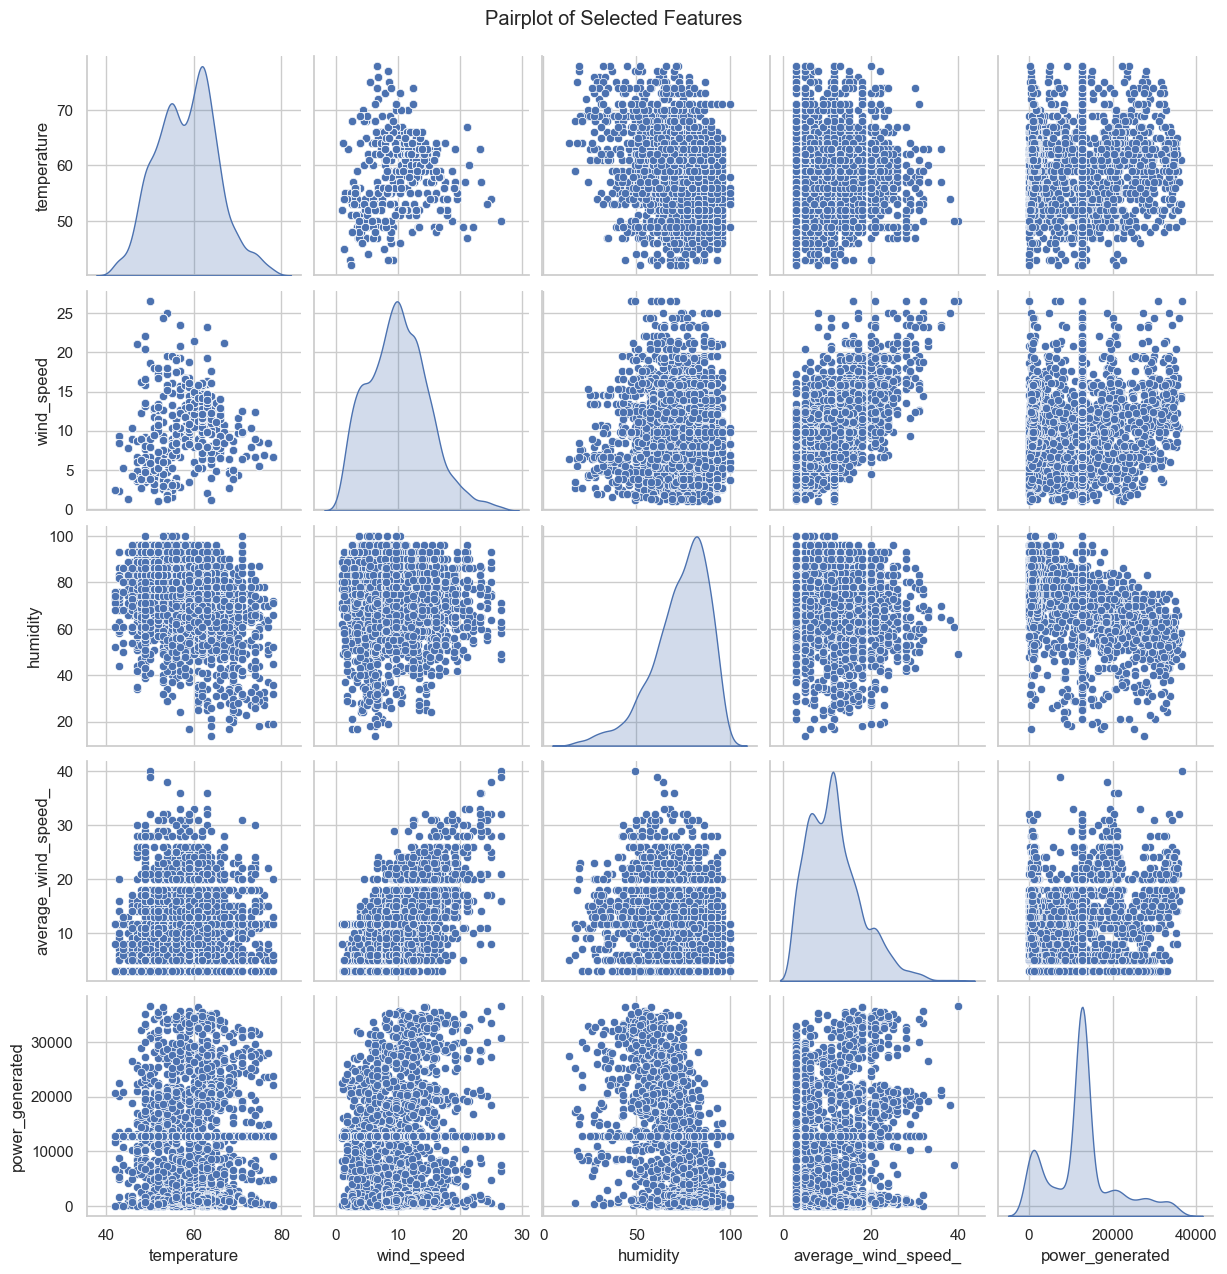

In [ ]:
print("\n Pairplot of Selected Features")
top_features = ['temperature', 'wind_speed', 'humidity', 'average_wind_speed_', 'power_generated']
sns.pairplot(df[top_features], diag_kind='kde')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

# 5. Line plot: Power vs Distance to Solar Noon


 Power vs Distance to Solar Noon


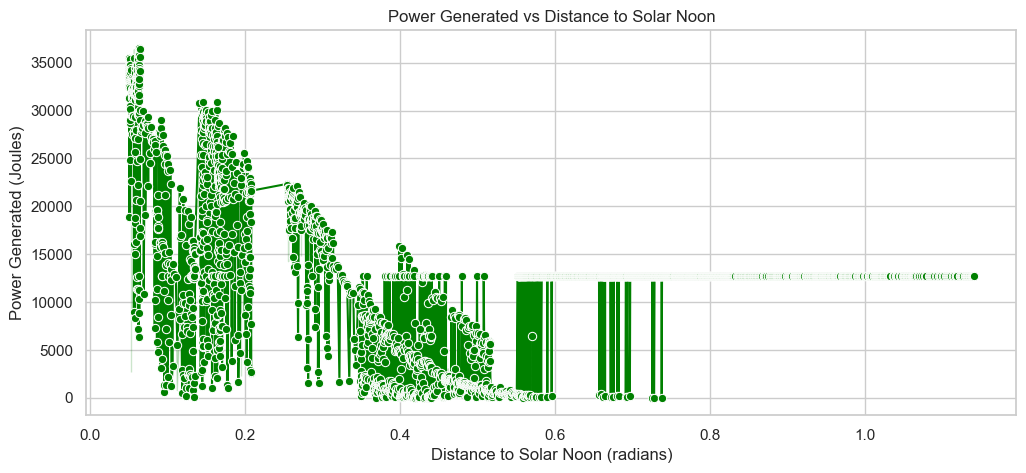

In [ ]:
print("\n Power vs Distance to Solar Noon")
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='distance_to_solar_noon', y='power_generated', marker='o', color='green')
plt.title('Power Generated vs Distance to Solar Noon')
plt.xlabel('Distance to Solar Noon (radians)')
plt.ylabel('Power Generated (Joules)')
plt.show()

# 6. Boxplot: Sky Cover vs Power Generated


☁️ Sky Cover vs Power Generated


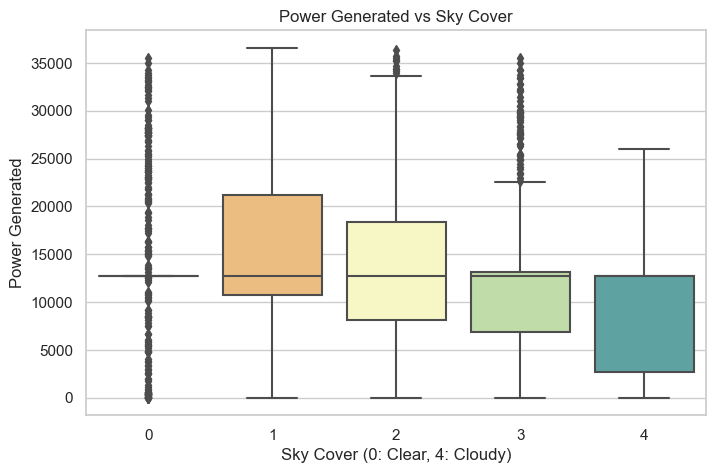

In [ ]:
print("\n☁️ Sky Cover vs Power Generated")
plt.figure(figsize=(8, 5))
sns.boxplot(x='sky_cover', y='power_generated', data=df, palette='Spectral')
plt.title('Power Generated vs Sky Cover')
plt.xlabel('Sky Cover (0: Clear, 4: Cloudy)')
plt.ylabel('Power Generated')
plt.show()

# 7. Summary of Insights

# 📌 Key EDA Insights
 1. Power Generated is right-skewed. We can consider log-transforming it for modeling.
 2. Temperature and proximity to solar noon positively influence power generation.
 3. Sky cover negatively affects power output — more clouds = less power.
 4. Outliers are present but not extreme; may be handled using IQR methods in modeling.
 5. Features like wind speed and humidity show weaker correlations with power.

# 📘 Model Building for Solar Power Generation Prediction

In this section, we implement and evaluate four regression models to predict `power_generated` based on environmental factors.

### 🔀 Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('power_generated', axis=1)
y = df['power_generated']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🔎 1. Xg-Boost Regression

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)

xgb_preds = xgb.predict(X_test)
xgb_r2 = r2_score(y_test, xgb_preds)
xgb_mse = mean_squared_error(y_test, xgb_preds)

print(f"XGBoost R² Score: {xgb_r2:.4f}")
print(f"XGBoost MSE: {xgb_mse:.2f}")

NameError: name 'r2_score' is not defined

## 🌲 2. Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

dt_preds = dt_model.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_preds)
dt_r2 = r2_score(y_test, dt_preds)

print(f"Decision Tree Regression MSE: {dt_mse:.2f}")
print(f"Decision Tree Regression R² Score: {dt_r2:.4f}")

## 🌳 3. Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print(f"Random Forest Regression MSE: {rf_mse:.2f}")
print(f"Random Forest Regression R² Score: {rf_r2:.4f}")

## 🚀 4. Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

gb_preds = gb_model.predict(X_test)

gb_mse = mean_squared_error(y_test, gb_preds)
gb_r2 = r2_score(y_test, gb_preds)

print(f"Gradient Boosting Regression MSE: {gb_mse:.2f}")
print(f"Gradient Boosting Regression R² Score: {gb_r2:.4f}")

# 📊 Compare Model Performance

### Create a DataFrame for comparison

In [ ]:
import pandas as pd

model_results = pd.DataFrame({
    'Model': ['Xg-Boost', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'MSE': [lr_mse, dt_mse, rf_mse, gb_mse],
    'R2 Score': [xgb_r2, dt_r2, rf_r2, gb_r2]
})

model_results.sort_values(by='R2 Score', ascending=False, inplace=True)
model_results.reset_index(drop=True, inplace=True)

model_results

In [ ]:
# Importing Libraries
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Defining parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.4],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

# Initializing the XGBoost Regressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Randomized Search CV
xgb_random = RandomizedSearchCV(estimator=xgb,
                                param_distributions=xgb_param_grid,
                                n_iter=100,
                                cv=5,
                                verbose=2,
                                random_state=42,
                                n_jobs=-1,
                                scoring='r2')

# Fitting the model
xgb_random.fit(X_train, y_train)

# Best XGBoost Estimator
best_xgb = xgb_random.best_estimator_

# Predictions
xgb_preds = best_xgb.predict(X_test)

# Evaluation
xgb_r2 = r2_score(y_test, xgb_preds)
xgb_mse = mean_squared_error(y_test, xgb_preds)

print(" Best Hyperparameters for XGBoost:")
print(xgb_random.best_params_)
print(f"\n📌 XGBoost Tuned R² Score: {xgb_r2:.4f}")
print(f"📉 XGBoost Tuned MSE: {xgb_mse:.2f}")
